# Facebook_Data_Viz
As of the first quarter of 2018, Facebook had 2.19 billion monthly active users!!
So this trend got us curious if we can analyze and compare how two different individuals use Facebook. We extracted data from our own Facebook profiles and analyzed the same to find some interesting insights.

## **This project has used data extracted from the profiles of :**

**1. Ribo :** A 23-year old 

**2. Aash:** A 24-year old aspiring data scientist who is an Economics graduate from Mumbai,India currently pursuing MS in Information Systems from Santa Clara University

## **The steps involved in execution of this project include:**

### **1. Data extraction:** 
In the Facebook settings for your account — right below the link to deactivate it — there’s an option to download a copy of all your Facebook data. All those years of browsing the News Feed, and sharing selfies, engagements and birthday wishes on Facebook have taught the company quite a lot about us. We, the users, are part of the reason that Facebook has become so good at targeting ads. Here's the link to download all your data: https://www.facebook.com/settings. You have the option to download the data in HTML or JSON format. We chose to download our data in JSON as we can easily parse it using Pandas in Python.

### **2. Data:** 
The downloaded zip folder has different folders containing different kinds of information about our Facebook activities such as Ads, Comments, Likes and reactions, messages, search history, friends etcetra

### **3. Data cleaning** 
As mentioned, we downloaded our data in JSON and the cleaning process involved preparing the data for analysis by parsing it from JSON format to dataframes

### **4. Hypothesis** 
We tested the following Hypotheses:

**A.1** Hypothesis for Ribo's messages: Conversations with ex-girlfriends vary from conversations with friends

**A.2** Hypothesis for Aash's messages: Conversations with high-school freinds vary from conversations with university friends

**B.1** Most active months of the year should be around one's Birthday month

**B.2** Reasons for reduced usage of Facebook could be mom joining Facebook or switching to other social media platforms such as Instagram/Snapchat

**C.1** We are more likely to "comment" on photos over both other comments and videos

**D.1** We "comment" and "like" more on weekends

**E.1** Even with their diverse backgrounds, Ribo and Aash should have some common advertisers

### **5. Testing:** 
To test the above Hyptheses we visualized the following:

**A.** Comparative word visualizations of messages

**B.** Visualizing and comparing most active months and years on Facebook by analyzing comments activity

**C.** We can comment on photos, videos, posts or reply to others comments. We were curious to find out if we are more likely to comment on photos, videos, posts or reply to others comments. So the third visualization is an area chart of Ribo and Aash comments acitivity over time. This is a plotly chart which can be viewed on: http://nbviewer.jupyter.org/github/prismray/Facebook_Data_Viz/blob/master/Facebook_Analysis_Ribo_Aash.ipynb

**D.** Heat Map representing the most active time and day of the week on Facebook, in terms of likes and comments for Aash and Ribo

**E.** The data also has a list of advertisers who have added our information to their list. Given our distinct backgrounds, we were curious to see if we have any common advertisers and so we visualized the same with a venn diagram wordcloud

In [362]:
# print all the outputs in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

In [363]:
# We imported the following packages for the project
import pandas as pd
import json
from nltk.corpus import stopwords
import datetime
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
% matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from curses import ascii
from matplotlib_venn_wordcloud import venn2_wordcloud

### A. Comparative word visualizations of messages
* Ribo : Word Visualizations of friend vs ex-girlfriend using the message history data
* Aash: Word Visualizations of high school friend vs university friend using the message history data

#### A.1 Hypothesis for Ribo's messages: Conversations with ex-girlfriends vary from conversations with friends

#### Data Cleaning Ribo's data: 
**Files used:**
1. ex.json, ex2.json, ex3.json, ex4.json each contain messages with Ribo's ex-girlfriends
1. friend_ribo.json which contains messages with his best friend

In [364]:
# Since the data is downloaded in json, we use the following code to convert .json files to pandas dataframes
with open('ex.json') as json_data:
    data_ex = json.load(json_data)
    
with open('ex2.json') as json_data:
    data_ex2 = json.load(json_data)

with open('ex3.json') as json_data:
    data_ex3 = json.load(json_data)

with open('ex4.json') as json_data:
    data_ex4 = json.load(json_data)

with open('friend_ribo.json') as json_data:
    data_ribo_friend = json.load(json_data)

In [365]:
#The dataframes have all the data in one column in the form of a dictionary. 
#We extract relevant values from the dictionary and convert it to a separate dataframe.
df_ex = pd.DataFrame.from_dict(data_ex['messages'])
df_ex2 = pd.DataFrame.from_dict(data_ex2['messages'])
df_ex3 = pd.DataFrame.from_dict(data_ex3['messages'])
df_ex4 = pd.DataFrame.from_dict(data_ex4['messages'])
df_ribo_friend = pd.DataFrame.from_dict(data_ribo_friend['messages'])

In [366]:
#The dataframe has a unix timestamp and we use the following code to convert it
df_ex['timestamp'] = df_ex['timestamp'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).\
                                                  strftime('%Y-%m-%d %H:%M:%S'))

df_ex2['timestamp'] = df_ex2['timestamp'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).\
                                              strftime('%Y-%m-%d %H:%M:%S'))

df_ex3['timestamp'] = df_ex3['timestamp'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).\
                                                  strftime('%Y-%m-%d %H:%M:%S'))

df_ex4['timestamp'] = df_ex4['timestamp'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).\
                                              strftime('%Y-%m-%d %H:%M:%S'))

df_ribo_friend['timestamp'] = df_ribo_friend['timestamp'].apply(lambda timestamp: datetime.datetime.\
                                              fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))

In [367]:
#Convert the content data series to a list
messages_ex = df_ex.content.tolist()
messages_ex2 = df_ex2.content.tolist()
messages_ex3 = df_ex3.content.tolist()
messages_ex4 = df_ex4.content.tolist()
messages_ribo_friend = df_ribo_friend.content.tolist()

In [368]:
#Create a final list for each ex-girlfriend and friend.
#Filter out empty elements of the list created in the previous code block by using the function isinstance()
messages_ex_final = []
for m in messages_ex:
    if isinstance(m, str):
        messages_ex_final.append(m)

messages_ex2_final = []
for m in messages_ex2:
    if isinstance(m, str):
        messages_ex2_final.append(m)

messages_ex3_final = []
for m in messages_ex3:
    if isinstance(m, str):
        messages_ex3_final.append(m)
        
messages_ex4_final = []
for m in messages_ex4:
    if isinstance(m, str):
        messages_ex4_final.append(m)

messages_ribo_friend_final = []
for m in messages_ribo_friend:
    if isinstance(m, str):
        messages_ribo_friend_final.append(m)

In [369]:
#Convert each list into a string of words
string_ex = (" ").join(messages_ex_final)
string_ex2 = (" ").join(messages_ex2_final)
string_ex3 = (" ").join(messages_ex3_final)
string_ex4 = (" ").join(messages_ex4_final)
string_ribo_friend = (" ").join(messages_ribo_friend_final)

In [370]:
#use stopwords from nltk package
stopwords = stopwords.words('english')

In [371]:
#add a few more stopwords to the imported list of stopwords
stopwords.append('ya')
stopwords.append('yes')
stopwords.append('na')
stopwords.append('Hey')
stopwords.append('HAHAHAHA')
stopwords.append('HAHAHA')
stopwords.append('hahahahaha')
stopwords.append('haha')
stopwords.append('HAHA')
stopwords.append('okay')
stopwords.append('I\'m')
stopwords.append('didnt')
stopwords.append('think')
stopwords.append('im')
stopwords.append('that')
stopwords.append('im')

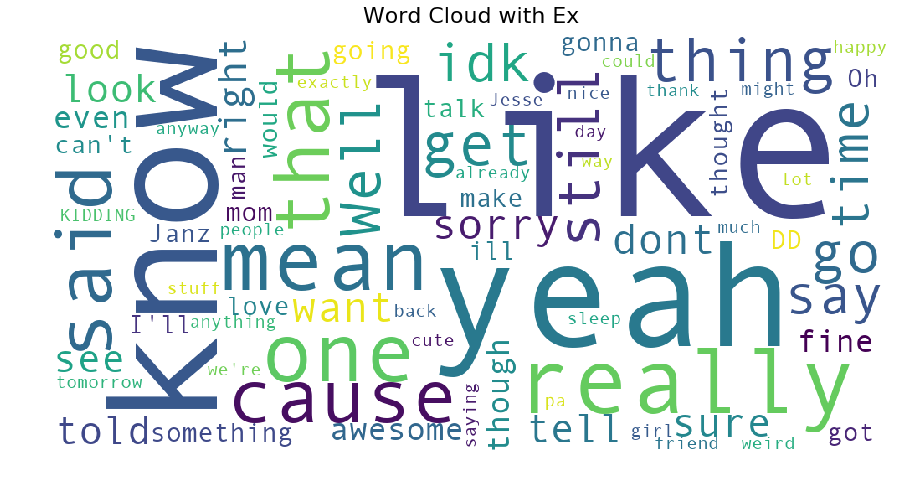

In [372]:
#Plot the worcloud, customize font, number of words, color scheme, size, title 
wordcloud_ex = WordCloud(font_path='/Library/Fonts/Andale Mono.ttf', min_font_size=12, max_words=75,\
                            width=1000, colormap="viridis", height=500, background_color="white",\
                            stopwords=stopwords).generate(string_ex)
plt.figure(figsize=(15,8));
plt.imshow(wordcloud_ex);
plt.title("Word Cloud with Ex", {'fontsize': 22}, y=1.02)
plt.axis("off");
plt.show();

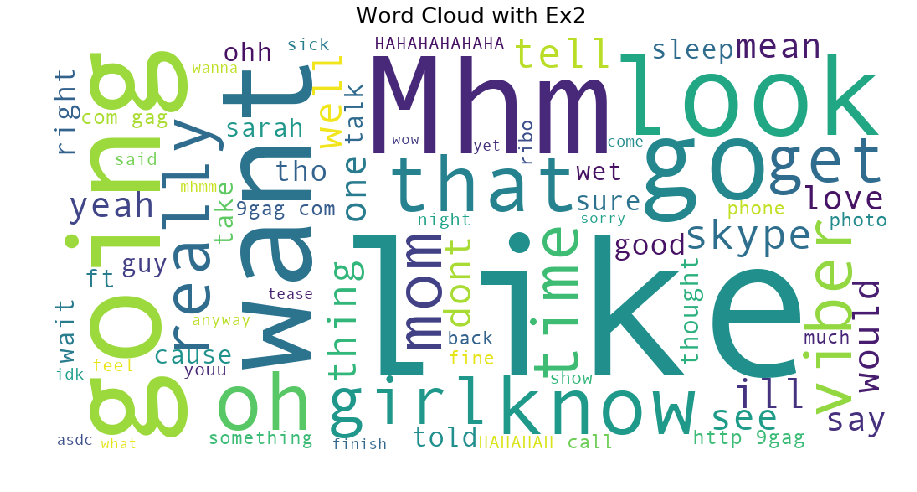

In [373]:
#Plot the worcloud, customize font, number of words, color scheme, size, title 
wordcloud_ex2 = WordCloud(font_path='/Library/Fonts/Andale Mono.ttf', min_font_size=12, max_words=75,\
                            width=1000, colormap="viridis", height=500, background_color="white",\
                            stopwords=stopwords).generate(string_ex2)
plt.figure(figsize=(15,8));
plt.imshow(wordcloud_ex2);
plt.title("Word Cloud with Ex2",{'fontsize': 22}, y=1.02)
plt.axis("off");
plt.show();

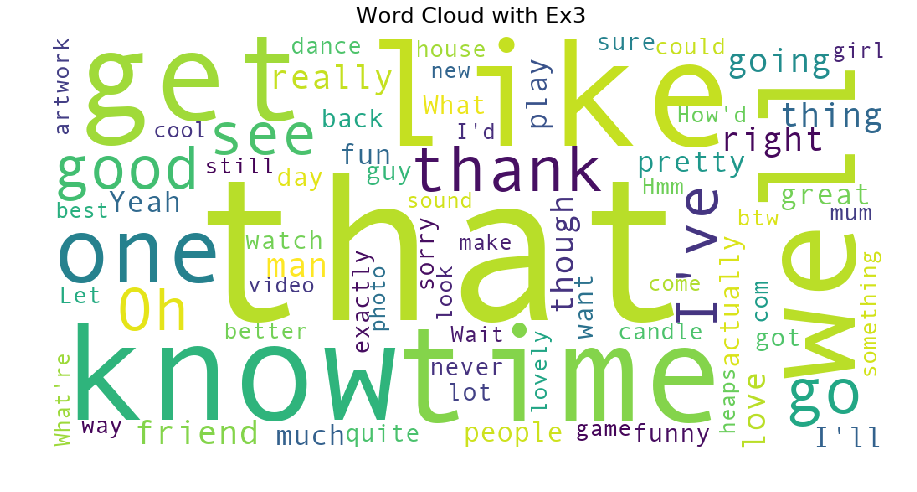

In [374]:
#Plot the worcloud, customize font, number of words, color scheme, size, title 
wordcloud_ex3 = WordCloud(font_path='/Library/Fonts/Andale Mono.ttf', min_font_size=12, max_words=75, \
                            width=1000, colormap="viridis", height=500, background_color="white",\
                            stopwords=stopwords).generate(string_ex3)
plt.figure(figsize=(15,8));
plt.imshow(wordcloud_ex3);
plt.title("Word Cloud with Ex3",{'fontsize': 22}, y=1.02)
plt.axis("off");
plt.show();

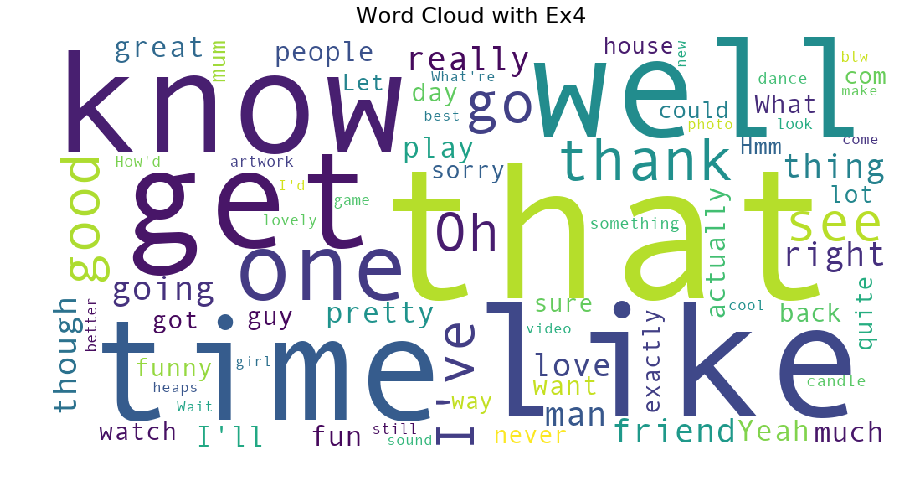

In [375]:
#Plot the worcloud, customize font, number of words, color scheme, size, title 
wordcloud_ex4 = WordCloud(font_path='/Library/Fonts/Andale Mono.ttf', min_font_size=12, max_words=75, \
                            width=1000, colormap="viridis", height=500, background_color="white",\
                            stopwords=stopwords).generate(string_ex3)
plt.figure(figsize=(15,8));
plt.imshow(wordcloud_ex4);
plt.title("Word Cloud with Ex4",{'fontsize': 22}, y=1.02)
plt.axis("off");
plt.show();

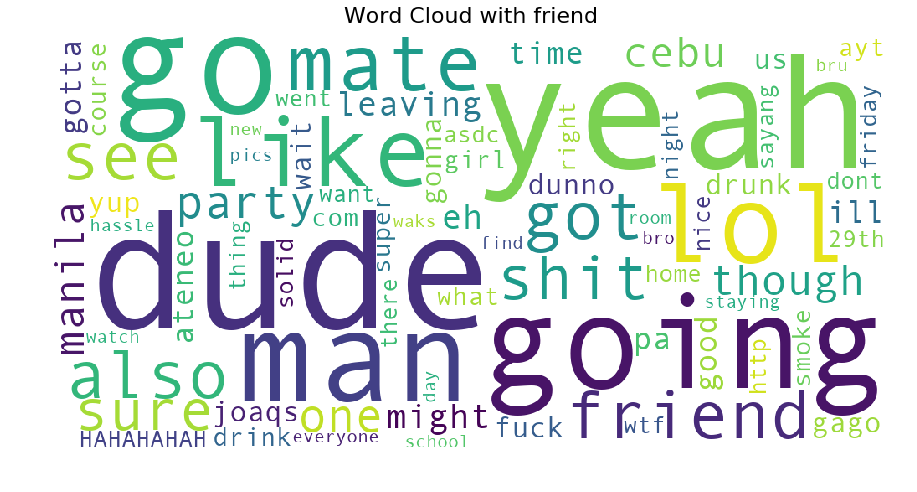

In [376]:
#Plot the worcloud, customize font, number of words, color scheme, size, title 
wordcloud_ribo_friend = WordCloud(font_path='/Library/Fonts/Andale Mono.ttf', min_font_size=12, max_words=75, \
                            width=1000, colormap="viridis", height=500, background_color="white",\
                            stopwords=stopwords).generate(string_ribo_friend)
plt.figure(figsize=(15,8));
plt.imshow(wordcloud_ribo_friend);
plt.title("Word Cloud with friend",{'fontsize': 22}, y=1.02)
plt.axis("off");
plt.show();

#### Insights: It can be inferred that Hypothesis A.1 is correct as Ribo generally has the same conversations across all his ex-girlfriends. However, his conversations with his friend is a little more exciting.

#### A.2 Hypothesis for Aash's messages: Conversations with high-school freinds vary from conversations with university friends

#### Data Cleaning Aash's data: 
**Files used:**
1. Swati.json which contains messages with her university friend Swati
1. Shrishty.json which contains messages with her high school friend Shrishty

In [377]:
# Since the data is downloaded in json, we use the following code to convert .json files to pandas dataframes
with open('Swati.json') as json_data:
    data_swati = json.load(json_data)
    
with open('Shrishty.json') as json_data:
    data_srish = json.load(json_data)

In [378]:
#The dataframes have all the data in one column in the form of a dictionary. 
#We extract relevant values from the dictionary and convert it to a separate dataframe.
df_swati = pd.DataFrame.from_dict(data_swati['messages'])
df_srish = pd.DataFrame.from_dict(data_srish['messages'])

In [379]:
#The dataframes have unix timestamps and we use the following code to convert it
df_swati['timestamp'] = df_swati['timestamp'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).\
                                                  strftime('%Y-%m-%d %H:%M:%S'))

df_srish['timestamp'] = df_srish['timestamp'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).\
                                                  strftime('%Y-%m-%d %H:%M:%S'))

In [380]:
#Convert the content data series to a list
messages_swati = df_swati.content.tolist()
messages_srish = df_srish.content.tolist()

In [381]:
#Create a final list for each friend
#Filter out empty elements of the list created in the previous code block by using the function isinstance()
messages_swati_final = []
for m in messages_swati:
    if isinstance(m, str):
        messages_swati_final.append(m)

messages_srish_final=[]
for m in messages_srish:
    if isinstance(m, str):
        messages_srish_final.append(m)    

In [382]:
#Convert each list into a string of words
string_swati = (" ").join(messages_swati_final)
string_srish = (" ").join(messages_srish_final)

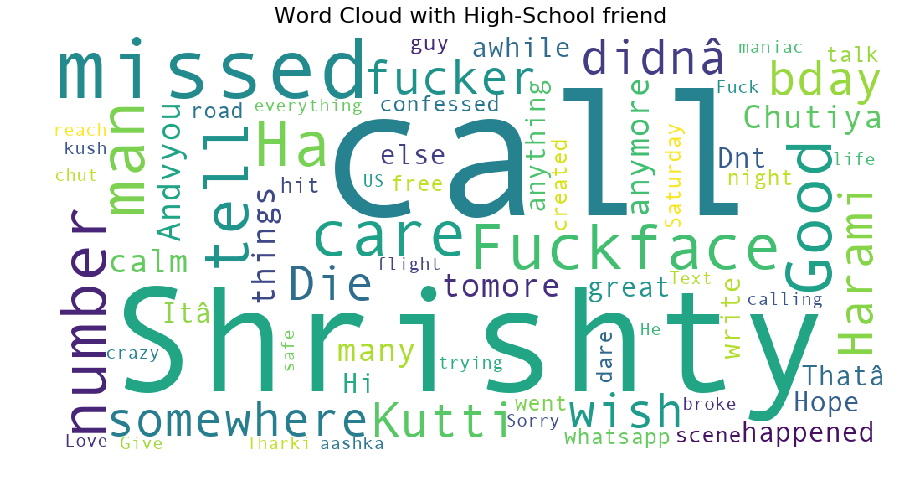

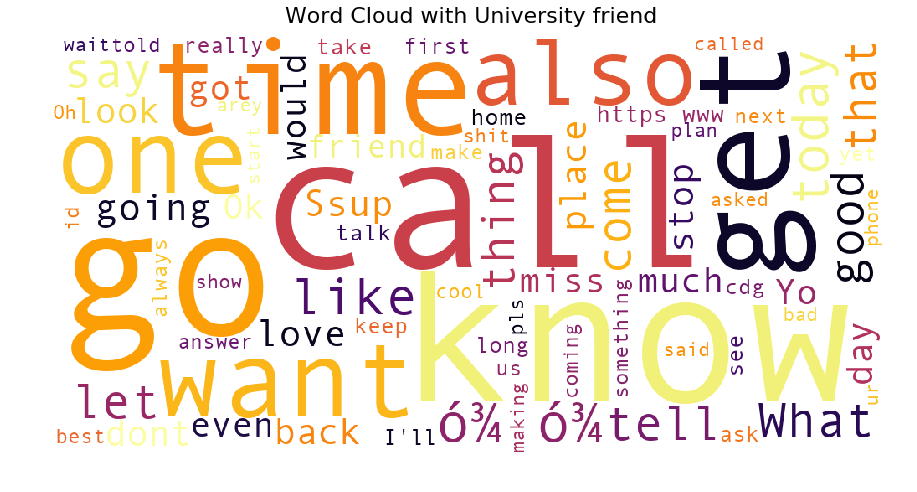

In [383]:
#Plot the worclouds, customize font, number of words, color scheme, size, title
wordcloud_srish = WordCloud(font_path='/Library/Fonts/Andale Mono.ttf', min_font_size=12, max_words=75, \
                            width=1000, colormap="viridis", height=500, background_color="white",\
                            stopwords=stopwords).generate(string_srish)
plt.figure(figsize=(15,8));
plt.imshow(wordcloud_srish);
plt.title("Word Cloud with High-School friend", {'fontsize': 22}, y=1.02)
plt.axis("off");
plt.show();


wordcloud_swati = WordCloud(font_path='/Library/Fonts/Andale Mono.ttf', min_font_size=14, max_words=75, \
                            width=1000, colormap="inferno", height=500, background_color="white",\
                            stopwords=stopwords).generate(string_swati)
plt.figure(figsize=(15,8));
plt.imshow(wordcloud_swati);
plt.title("Word Cloud with University friend", {'fontsize': 22}, y=1.02)
plt.axis("off");
plt.show();

####  Insights: It can be inferred that Hypothesis A.2 is correct as:
* With the High-School friend a lot of Hindi profane slangs can be observed as it is characteristic of the dialect spoken in Northern India, which is where Aash went to boarding school. Also it is interesting that most of her Facebook messages are from after she graduated high school and were exchanged when she was away from her high-school friends and so a lot of the words like 'missed' could be occuring often as they we reminiscing
* Meanwhile her University friend lived really close to where she lived and so most conversations would revolve around plans and about the present which explains high occurence of the words 'now', 'go','get','time','today','got'

### B. Visualizing and comparing most active months and years on Facebook by analyzing comments activity

#### Hypothesis: 
B.1 Most active months of the year should be around one's Birthday month

B.2 Reasons for reduced usage of Facebook could be mom joining Facebook or switching to other social media platforms such as Instagram/Snapchat 

In [384]:
# Since the data is downloaded in json, we use the following code to convert .json files to pandas dataframes
with open('ribo_comments.json') as json_data:
    ribo_comments_data = json.load(json_data)
    
with open('aash_comments.json') as json_data:
    aash_comments_data = json.load(json_data)

In [385]:
#The dataframes have all the data in one column in the form of a dictionary. 
#We extract relevant values from the dictionary and convert it to a separate dataframe.
df_ribo_comments = pd.DataFrame.from_dict(ribo_comments_data['comments'])
df_aash_comments = pd.DataFrame.from_dict(aash_comments_data['comments'])

In [386]:
#The dataframes have unix timestamps and we use the following code to convert it
df_ribo_comments['timestamp'] = df_ribo_comments['timestamp'].apply(\
    lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))

df_aash_comments['timestamp'] = df_aash_comments['timestamp'].apply(\
    lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))

In [387]:
# Create a column 'Months' and extract its value from the timestamp column using the following code
df_ribo_comments['Months'] = pd.to_datetime(df_ribo_comments['timestamp']).dt.month
df_aash_comments['Months'] = pd.to_datetime(df_aash_comments['timestamp']).dt.month

In [388]:
#Create new dataframes after grouping by Months and counting comments for every month
ribo_months = df_ribo_comments.groupby('Months')['data'].count().reset_index()
aash_months = df_aash_comments.groupby('Months')['data'].count().reset_index()

In [389]:
#Create a new column 'Month' which has the month name corresponding to every month number
months = [date.strftime("%b") for date in pd.date_range(start='1/2017', end='1/2018', freq='M')]
ribo_months['Month'] = months
aash_months['Month'] = months

In [390]:
# Merge Aash and Ribo's month dataframes to plot into one chart
months_activity = ribo_months.merge(aash_months[['data', 'Month']], left_on='Month', right_on='Month')

In [391]:
#Rename the columns with relevant values after merging
months_activity.rename(columns={'data_x': 'Ribo\'s comments', 'data_y': 'Aash\'s comments'}, inplace=True)

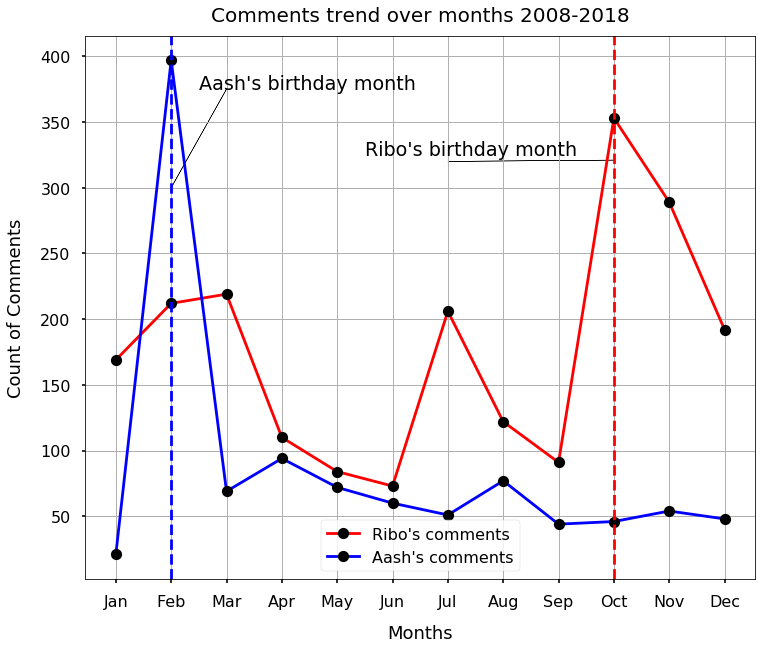

In [392]:
#Plot a chart to depict Commenting trend over months across 2008-2018 with relevant customizations
sns.set_context("poster")
plt.figure(figsize=(12, 10));
plt.plot(months_activity['Ribo\'s comments'],  'r', linestyle='-',\
         markevery=1, marker='o', markerfacecolor='black');
plt.plot(months_activity['Aash\'s comments'],  'b', linestyle='-',\
         markevery=1, marker='o', markerfacecolor='black');
plt.title("Comments trend over months 2008-2018", fontsize=20, y=1.015);
plt.ylabel("Count of Comments", fontsize=18, labelpad=15);
plt.xlabel("Months", fontsize=18, labelpad=15);
plt.xticks(ribo_months.index, months_activity['Month']);
plt.grid(b=True, linewidth=1);
plt.axvline(x=1, linestyle='--', color='b')
plt.text(1.5, 375.0, 'Aash\'s birthday month')
plt.arrow(1, 300, 1., 75)
plt.axvline(x=9, linestyle='--', color='r')
plt.text(4.5, 325.0, 'Ribo\'s birthday month')
plt.arrow(6, 320, 3, 1)
plt.legend();

#### Insights: It can be inferred from the graph above that Hypothesis B.1 is correct as, in both our cases we are most active in our Birthday Months

In [393]:
#Create a new column 'Years' with values extracted from the column timestamp
df_ribo_comments['Years'] = pd.to_datetime(df_ribo_comments['timestamp']).dt.year
df_aash_comments['Years'] = pd.to_datetime(df_aash_comments['timestamp']).dt.year

In [394]:
#Create new dataframes after grouping by Years and counting comments per year
ribo_years = df_ribo_comments.groupby('Years')['data'].count().reset_index()
aash_years = df_aash_comments.groupby('Years')['data'].count().reset_index()

In [395]:
#Merge Aash and Ribo's yearly comments dataframe into one
years_activity = ribo_years.merge(aash_years[['data','Years']], left_on='Years', right_on='Years', how='right')

In [396]:
#Rename columns with relevant values after merging
years_activity.rename(columns={'data_x': 'Ribo\'s comments','data_y': 'Aash\'s comments'}, inplace=True)

In [397]:
#Fill na values in the dataframe
years_activity.fillna('0', inplace=True)

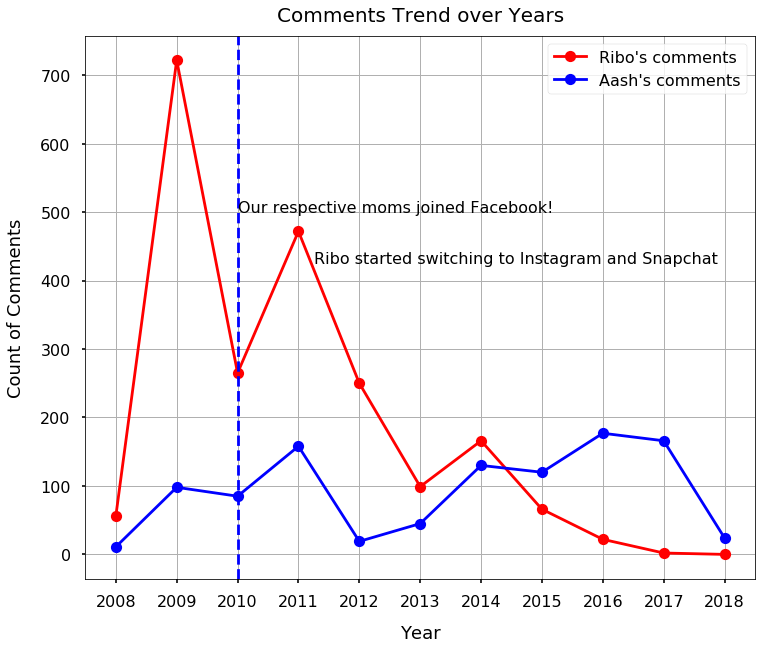

In [398]:
#Plot a chart to depict Commenting trend the years 2008-2018 with relevant customizations
sns.set_context("poster")
plt.figure(figsize=(12, 10));
plt.plot(years_activity['Ribo\'s comments'],  'r', linestyle='-',\
         markevery=1, marker='o', markerfacecolor='r');
plt.plot(years_activity['Aash\'s comments'],  'b', linestyle='-',\
         markevery=1, marker='o', markerfacecolor='b');

plt.title("Comments Trend over Years", fontsize=20, y=1.015);
plt.xlabel("Year", fontsize=18, labelpad=15);
plt.ylabel("Count of Comments", fontsize=18, labelpad=15);
plt.xticks(years_activity.index, years_activity['Years']);
plt.axvline(x=2, linestyle='--', c='b');
plt.text(2, 500, 'Our respective moms joined Facebook!', fontsize=16)
plt.text(3.25, 425, 'Ribo started switching to Instagram and Snapchat', fontsize=16)
plt.grid(b=True, linewidth=1);
plt.legend()
plt.show();

#### Insights: It can be inferred from the graph above that Hypothesis B.2 is correct in Ribo's case but doesn't hold true in Aash's case as her comments did drop a little when her mom joined Facebook, but they picked up again since she isn't too active on other social media platforms explaining why her Facebook usage remained unaffected except in the mid-2012 to mid-2013 period when she was close to graduation and busy with studies.

### C. We can comment on photos, videos, posts or reply to others comments. We were curious to find out if we are more likely to comment on photos, video, posts or reply to others comments. So the third visualization is a comparison of Ribo and Aash's comments acitivity over time

#### C.1 Hypothesis : We are more likely to comment on photos over both other comments and videos

In [399]:
#Create a new column 'action' to capture 'Comments' and 'Replies'
df_aash_comments['action'] = df_aash_comments['title'].\
apply(lambda action: 'Comment' if 'commented' in action else 'Reply')

df_ribo_comments['action'] = df_ribo_comments['title'].\
apply(lambda action: 'Comment' if 'commented' in action else 'Reply')

In [400]:
#Create a new column 'action_item' to capture if the comment was on 'Photos', 'Videos', 'Comments', 'Posts'
df_aash_comments['action_item'] = df_aash_comments['title'].apply(lambda item: 'Video' if 'video' in item else \
                                      ('Photo'if 'photo' in item else ('Post' if 'post' in item else 'Comment')))

df_ribo_comments['action_item'] = df_ribo_comments['title'].apply(lambda item: 'Video' if 'video' in item else \
                                      ('Photo'if 'photo' in item else ('Post' if 'post' in item else 'Comment')))

In [401]:
#Create a column 'Subject' to capture on whose Page was the comment made
df_aash_comments['Subject'] = df_aash_comments['title'].astype('str').apply(lambda subject: \
                                                subject[subject.find('on')+len('on')+1: subject.find("'")] \
                                                if 'commented' in subject else \
                                                subject[subject.find('to')+len('to')+1: subject.find("'")])

df_aash_comments['Subject'].replace(to_replace='her own post', value='Self', inplace=True)
df_aash_comments['Subject'].replace(to_replace='her own photo', value='Self', inplace=True)


df_ribo_comments['Subject'] = df_ribo_comments['title'].astype('str').apply(lambda subject: \
                                                subject[subject.find('on')+len('on')+1: subject.find("'")] \
                                                if 'commented' in subject else \
                                                subject[subject.find('to')+len('to')+1: subject.find("'")])

df_ribo_comments['Subject'].replace(to_replace='her own post', value='Self', inplace=True)
df_ribo_comments['Subject'].replace(to_replace='her own photo', value='Self', inplace=True)

In [402]:
#Import Aash and Ribo's friend list
data_friends_aash = pd.read_json('aash_friends.json')
data_friends_ribo = pd.read_json('ribo_friends.json')

In [403]:
#Extract Aash and Ribo's friend's names from the dictionary in the dataframe
data_friends_aash['name'] = data_friends_aash['friends'].apply(lambda friend: friend.get('name'))
data_friends_ribo['name'] = data_friends_ribo['friends'].apply(lambda friend: friend.get('name'))

In [404]:
#Convert the Series in to a list
friend_list_aash = data_friends_aash.name.tolist()
friend_list_ribo = data_friends_ribo.name.tolist()

In [405]:
#Create a column subject type to capture if the Subject is a friend or a public page
df_aash_comments['Subject_Type'] = df_aash_comments['Subject'].apply(lambda subject: 'Friend' \
                                             if subject in friend_list_aash else ('Self')\
                                             if subject=='Self' else 'Public Page')

df_ribo_comments['Subject_Type'] = df_ribo_comments['Subject'].apply(lambda subject: 'Friend' \
                                         if subject in friend_list_ribo else ('Self')\
                                         if subject=='Self' else 'Public Page')

In [406]:
#Define a function to convert month number to month name and create a column 'Month' which has the month name
def month_converter(month):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return months[month- 1]

df_aash_comments['Month'] = df_aash_comments['Months'].apply(lambda month_number: month_converter(month_number))
df_ribo_comments['Month'] = df_ribo_comments['Months'].apply(lambda month_number: month_converter(month_number))


In [407]:
#Create new dataframes after grouping by month number, month name, action_item and finding the count of comments for each
df_top_aash = df_aash_comments.groupby(['Month', 'Months', 'action_item']).agg({'title': 'count'}).\
rename(columns={'title': 'count'}).sort_values('count', ascending=False).reset_index()

df_top_ribo = df_ribo_comments.groupby(['Month', 'Months', 'action_item']).agg({'title': 'count'}).\
rename(columns={'title': 'count'}).sort_values('count', ascending=False).reset_index()

In [408]:
#Create separate dataframes based on action item's value : Video/Comment/Photo/Post
df_aash_video = df_top_aash[df_top_aash.action_item == 'Video'].sort_values('Months', ascending=True)
df_aash_Comm = df_top_aash[df_top_aash.action_item == 'Comment'].sort_values('Months', ascending=True)
df_aash_Photo = df_top_aash[df_top_aash.action_item == 'Photo'].sort_values('Months', ascending=True)
df_aash_Posts = df_top_aash[df_top_aash.action_item == 'Post'].sort_values('Months', ascending=True)

df_ribo_video=df_top_ribo[df_top_ribo.action_item == 'Video'].sort_values('Months', ascending=True)
df_ribo_Comm=df_top_ribo[df_top_ribo.action_item == 'Comment'].sort_values('Months', ascending=True)
df_ribo_Photo=df_top_ribo[df_top_ribo.action_item == 'Photo'].sort_values('Months', ascending=True)
df_ribo_Posts=df_top_ribo[df_top_ribo.action_item == 'Post'].sort_values('Months', ascending=True)

In [409]:
#Plot the area chart for Aash using plotly to observe which action_item was most commented on
Photos = go.Scatter(
    x=df_aash_Photo['Month'], y=df_aash_Photo['count'], name="Photo comments", mode='none', fill='tozeroy')

Videos = go.Scatter(
    x=df_aash_video['Month'], y=df_aash_video['count'], name="Video comments", mode='none', fill='tozeroy')

Posts = go.Scatter(
    x=df_aash_Posts['Month'], y=df_aash_Posts['count'], name ="Post comments", mode='none', fill='tozeroy')

Comments = go.Scatter(
    x=df_aash_Comm['Month'], y=df_aash_Comm['count'], name="Reply to comments", mode='none', fill='tozeroy')

layout = dict(
    title='Comments trend Aash: 2008-2018', xaxis= dict(title='Months across 2008-2018'),\
    yaxis= dict(title='Count of Comments'))

data = [Photos, Comments, Videos]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='basic-area-no-bound')

# To view interactive chart go to: 
#http://nbviewer.jupyter.org/github/prismray/Facebook_Data_Viz/blob/master/Facebook_Analysis_Ribo_Aash.ipynb

#### Insights: It can be inferred from the graph above that Hypotheses C.1 holds true for Aash as her comments on Photos are higher than replies to other comments which are higher than comments on videos

In [410]:
#Plot the area chart for Aash using plotly to observe which action_item was most commented on
Photos = go.Scatter(
    x=df_ribo_Photo['Month'], y=df_ribo_Photo['count'], name="Photo comments", mode='none', fill='tozeroy')

Videos = go.Scatter(
    x=df_ribo_video['Month'], y=df_ribo_video['count'], name="Video comments", mode='none', fill='tozeroy')

Posts = go.Scatter(
    x=df_ribo_Posts['Month'], y=df_ribo_Posts['count'], name="Post comments", mode='none', fill='tozeroy')

Comments = go.Scatter(
    x=df_ribo_Comm['Month'], y=df_ribo_Comm['count'], name="Reply to comments", mode='none', fill='tozeroy')

layout = dict(
    title='Comments trend Ribo: 2008-2018', xaxis= dict(title='Months across 2008-2018'),\
    yaxis= dict(title='Count of Comments'))

data = [Photos, Comments, Videos]
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='basic-area-no-bound')
# To view interactive chart go to: 
#http://nbviewer.jupyter.org/github/prismray/Facebook_Data_Viz/blob/master/Facebook_Analysis_Ribo_Aash.ipynb

#### Insights: It can be inferred from the graph above that Hypotheses C.1 holds true for Ribo also as his comments on Photos are higher than replies to other comments which are higher than comments on videos

### D. Heat Map representing the most active time and day of the week on Facebook for Aash and Ribo

#### D.1 Hypothesis: We comment and like more on weekends

In [354]:
# Since the data is downloaded in json, we use the following code to convert .json files to pandas dataframes
with open('ribo_likes.json') as json_data:
    ribo_likes_data = json.load(json_data)

with open('aash_likes.json') as json_data:
    aash_likes_data = json.load(json_data)

In [355]:
# Since the data is downloaded in json, we use the following code to convert .json files to pandas dataframes
with open('ribo_comments.json') as json_data:
    ribo_comments_data = json.load(json_data)

with open('aash_comments.json') as json_data:
    aash_comments_data = json.load(json_data)

#### D.2 Preparing data for heatmaps : Facebook Likes Data

In [287]:
#Convert nested dictionary to list
ribo_likes_data_list = list(ribo_likes_data)
aash_likes_data_list = list(aash_likes_data)

In [288]:
#Convert nested dictionary to dataframe
df_ribo_likes = pd.DataFrame.from_dict(ribo_likes_data['reactions'])
df_aash_likes = pd.DataFrame.from_dict(aash_likes_data['reactions'])

In [289]:
#Convert unix timestamp using the following function
df_ribo_likes['timestamp'] = df_ribo_likes['timestamp'].\
apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))

df_aash_likes['timestamp']=df_aash_likes['timestamp'].\
apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))

In [290]:
#Create a column called 'Months' and extract its value from the timestamp column
df_ribo_likes['Months'] = pd.to_datetime(df_ribo_likes['timestamp']).dt.month
df_aash_likes['Months'] = pd.to_datetime(df_aash_likes['timestamp']).dt.month

In [291]:
#Create new dataframes after grouping by months and counting comments for every month
ribo_months = df_ribo_likes.groupby('Months').count().reset_index()
aash_months = df_aash_likes.groupby('Months').count().reset_index()

In [292]:
#Create a column called 'Years' and extract its value from the timestamp column
df_ribo_likes['Years'] = pd.to_datetime(df_ribo_likes['timestamp']).dt.year
df_aash_likes['Years'] = pd.to_datetime(df_aash_likes['timestamp']).dt.year

In [293]:
#Create new dataframes after grouping by Years and counting comments for every month
ribo_years = df_ribo_likes.groupby('Years').count().reset_index()
aash_years = df_aash_likes.groupby('Years').count().reset_index()

In [294]:
#Converting the timestamp into appropriate format to extract Day, Hour and Hour from it
df_ribo_likes['timestamp'] = pd.to_datetime(df_ribo_likes['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_aash_likes['timestamp'] = pd.to_datetime(df_aash_likes['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [295]:
# Extract the value of Day from the timestamp
df_ribo_likes['Day'] = pd.to_datetime(df_ribo_likes['timestamp']).dt.dayofweek
df_aash_likes['Day'] = pd.to_datetime(df_aash_likes['timestamp']).dt.dayofweek

In [296]:
# Extract the value of Hour from the timestamp
df_ribo_likes['Hour'] = df_ribo_likes['timestamp'].dt.round('1H')
df_ribo_likes['Hour'] = pd.to_datetime(df_ribo_likes['Hour']).dt.hour

df_aash_likes['Hour'] = df_aash_likes['timestamp'].dt.round('1H')
df_aash_likes['Hour'] = pd.to_datetime(df_aash_likes['Hour']).dt.hour

#### D.3 Preparing data for heatmaps : Facebook Comments Data

In [297]:
#Convert the nested dictionary to list
ribo_comments_data_list = list(ribo_comments_data)
aash_comments_data_list = list(aash_comments_data)

In [298]:
#Convert the nested dictionary to dataframes
df_ribo_comments = pd.DataFrame.from_dict(ribo_comments_data['comments'])
df_aash_comments = pd.DataFrame.from_dict(aash_comments_data['comments'])

In [299]:
#Convert unix timestamp using the following function
df_ribo_comments['timestamp'] = df_ribo_comments['timestamp'].\
apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))

df_aash_comments['timestamp'] = df_aash_comments['timestamp'].\
apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S'))

In [300]:
#Create a column called 'Months' and extract its value from the timestamp column
df_ribo_comments['Months'] = pd.to_datetime(df_ribo_comments['timestamp']).dt.month
df_aash_comments['Months'] = pd.to_datetime(df_aash_comments['timestamp']).dt.month

In [301]:
#Create new dataframes after grouping by months and counting comments for every month
ribo_months = df_ribo_comments.groupby('Months').count().reset_index()
aash_months = df_aash_comments.groupby('Months').count().reset_index()

In [302]:
#Create a column called 'Years' and extract its value from the timestamp column
df_ribo_comments['Years'] = pd.to_datetime(df_ribo_comments['timestamp']).dt.year
df_aash_comments['Years'] = pd.to_datetime(df_aash_comments['timestamp']).dt.year

In [303]:
#Create new dataframes after grouping by Years and counting comments for every month
ribo_years = df_ribo_comments.groupby('Years').count().reset_index()
aash_years = df_aash_comments.groupby('Years').count().reset_index()

In [304]:
#Converting the timestamp into appropriate format to extract Day, Hour and Hour from it
df_ribo_comments['timestamp'] = pd.to_datetime(df_ribo_comments['timestamp'],format= '%Y-%m-%d %H:%M:%S')
df_aash_comments['timestamp'] = pd.to_datetime(df_aash_comments['timestamp'],format= '%Y-%m-%d %H:%M:%S')

In [305]:
# Extract the value of Day from the timestamp
df_ribo_comments['Day'] = pd.to_datetime(df_ribo_comments['timestamp']).dt.dayofweek
df_aash_comments['Day'] = pd.to_datetime(df_aash_comments['timestamp']).dt.dayofweek

In [306]:
# Extract the value of Hour from the timestamp
df_ribo_comments['Hour'] = df_ribo_comments['timestamp'].dt.round('1H')
df_ribo_comments['Hour'] = pd.to_datetime(df_ribo_comments['Hour']).dt.hour

df_aash_comments['Hour'] = df_aash_comments['timestamp'].dt.round('1H')
df_aash_comments['Hour'] = pd.to_datetime(df_aash_comments['Hour']).dt.hour

#### D.4 Final steps for heatmap

#### Likes

In [307]:
#Create new columns to capture time and day's name
df_ribo_likes['time_datetime'] = pd.to_datetime(df_ribo_likes['timestamp'])
df_ribo_likes['day_name'] = df_ribo_likes['time_datetime'].dt.weekday_name;

df_aash_likes['time_datetime'] = pd.to_datetime(df_aash_likes['timestamp'])
df_aash_likes['day_name'] = df_aash_likes['time_datetime'].dt.weekday_name;

In [308]:
#Create new dataframes by making a pivot on day_name, hour to find count of likes
df_ribo_likes2 = pd.pivot_table(df_ribo_likes[['day_name', 'Hour', 'title']],\
                                   index=['day_name', 'Hour'], aggfunc='count')

df_aash_likes2 = pd.pivot_table(df_aash_likes[['day_name', 'Hour', 'title']],\
                                   index=['day_name', 'Hour'], aggfunc='count')

In [309]:
#Unstack the datasets
df_ribo_likes3 = df_ribo_likes2.unstack(level=0)

df_aash_likes3 = df_aash_likes2.unstack(level=0)

In [311]:
#Reindex the dataframes to the day's names
df_ribo_likes3 = df_ribo_likes3.reindex(labels=[\
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)

df_aash_likes3 = df_aash_likes3.reindex(labels=[\
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)

In [315]:
#Create a list with short names to refer to days of the week
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

#### Comments

In [316]:
#Create new columns to capture time and day's name
df_ribo_comments['time_datetime'] = pd.to_datetime(df_ribo_comments['timestamp'])
df_ribo_comments['day_name'] = df_ribo_comments['time_datetime'].dt.weekday_name;

df_aash_comments['time_datetime'] = pd.to_datetime(df_aash_comments['timestamp'])
df_aash_comments['day_name'] = df_aash_comments['time_datetime'].dt.weekday_name;

In [317]:
#Create new dataframes by making a pivot on day_name, hour to find count of likes
df_ribo_comments2 = pd.pivot_table(df_ribo_comments[['day_name', 'Hour', 'title']],\
                                   index=['day_name', 'Hour'], aggfunc='count')

df_aash_comments2 = pd.pivot_table(df_aash_comments[['day_name', 'Hour', 'title']],\
                                   index=['day_name', 'Hour'], aggfunc='count')

In [318]:
#Unstack the datasets
df_ribo_comments3 = df_ribo_comments2.unstack(level=0)
df_aash_comments3 = df_aash_comments2.unstack(level=0)

In [319]:
#Reindex the dataframes to the day's names
df_ribo_comments3 = df_ribo_comments3.reindex(labels=[\
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)

df_aash_comments3 = df_aash_comments3.reindex(labels=[\
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1, level=1)

In [320]:
#Convert the hours to am/pm time
morning_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "am"
    morning_hours.append(detailed_hour)

In [321]:
#Convert the hours to am/pm time
afternoon_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + "pm"
    afternoon_hours.append(detailed_hour)

In [322]:
#Further format the time depiction for better readibility
detailed_hours = ["12am"] + morning_hours + ["12pm"] + afternoon_hours

#### D.5 Plotting Ribo's heatmap for likes

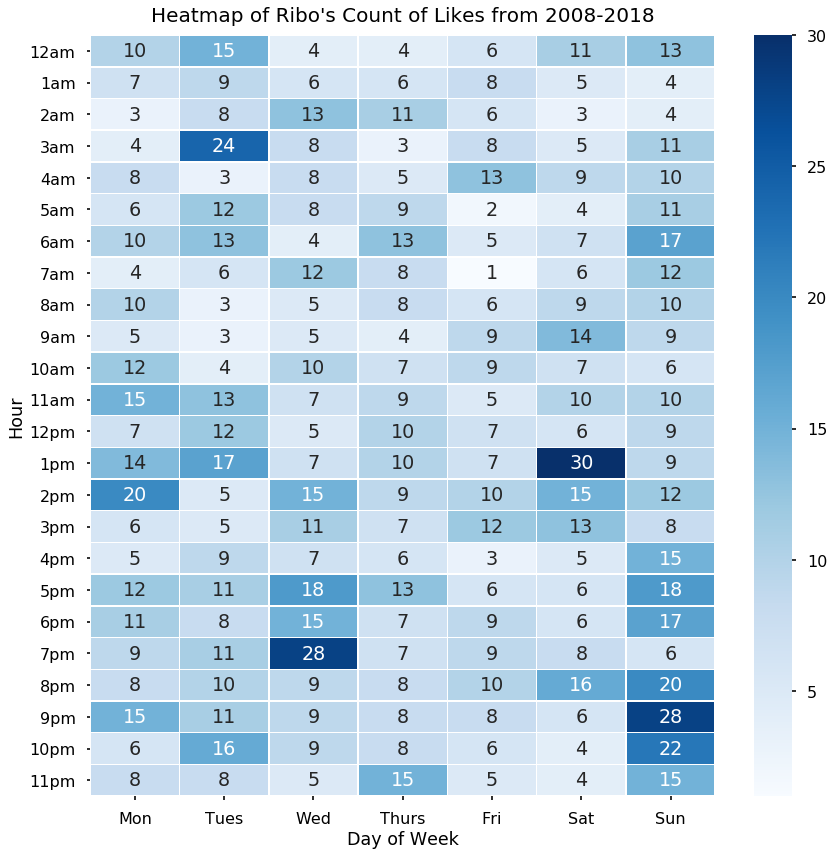

In [338]:
#Plot a heatmap with relevant customizations
sns.set_context("poster")
f,ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(df_ribo_likes3, annot=True, linewidths=.5, ax=ax, cmap="Blues", \
                 xticklabels=day_short_names, yticklabels=detailed_hours)
ax.axes.set_title("Heatmap of Ribo's Count of Likes from 2008-2018", fontsize=20, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Hour');

#### D.6 Plotting Ribo's heatmap for comments

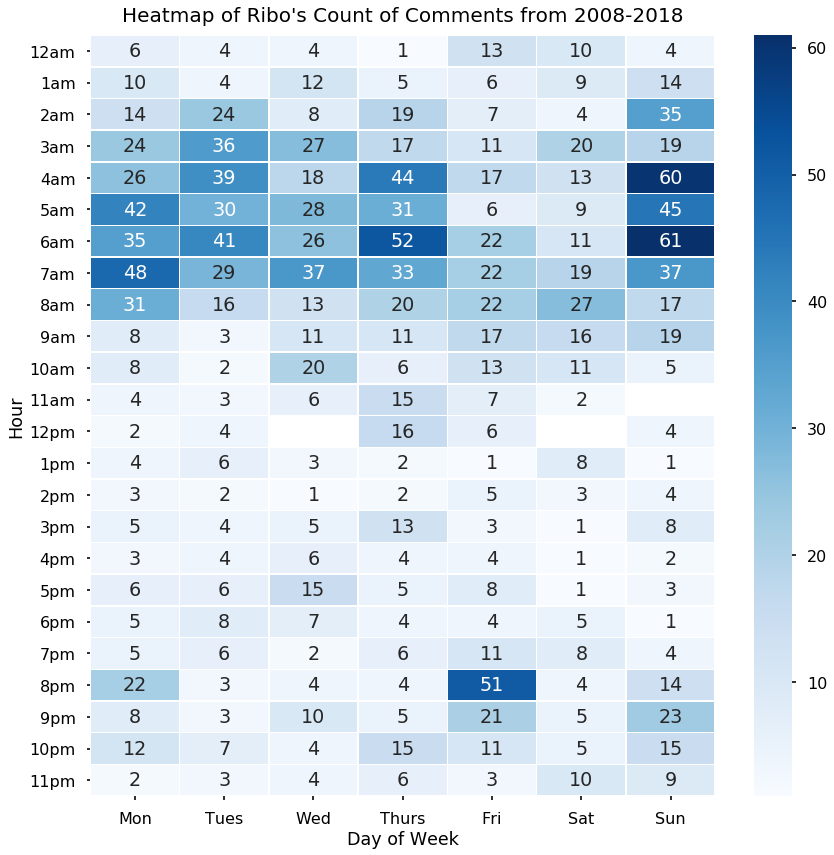

In [339]:
#Plot a heatmap with relevant customizations
sns.set_context("poster")
f, ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(df_ribo_comments3, annot=True, linewidths=.5, ax=ax, cmap="Blues",\
                 xticklabels=day_short_names, yticklabels=detailed_hours)
ax.axes.set_title("Heatmap of Ribo's Count of Comments from 2008-2018", fontsize=20, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Hour');

#### Insights: From the above two heatmaps it can be inferred that Hypothesis D.1 is correct for Ribo, as he comments most on Sundays from 4am-7am and likes the most on Sunday from 8pm to 11pm. This additionally suggests that he comments first and when friends reply to his comments, he "likes" their replies.

#### D.7 Plotting Aash's heatmap for likes

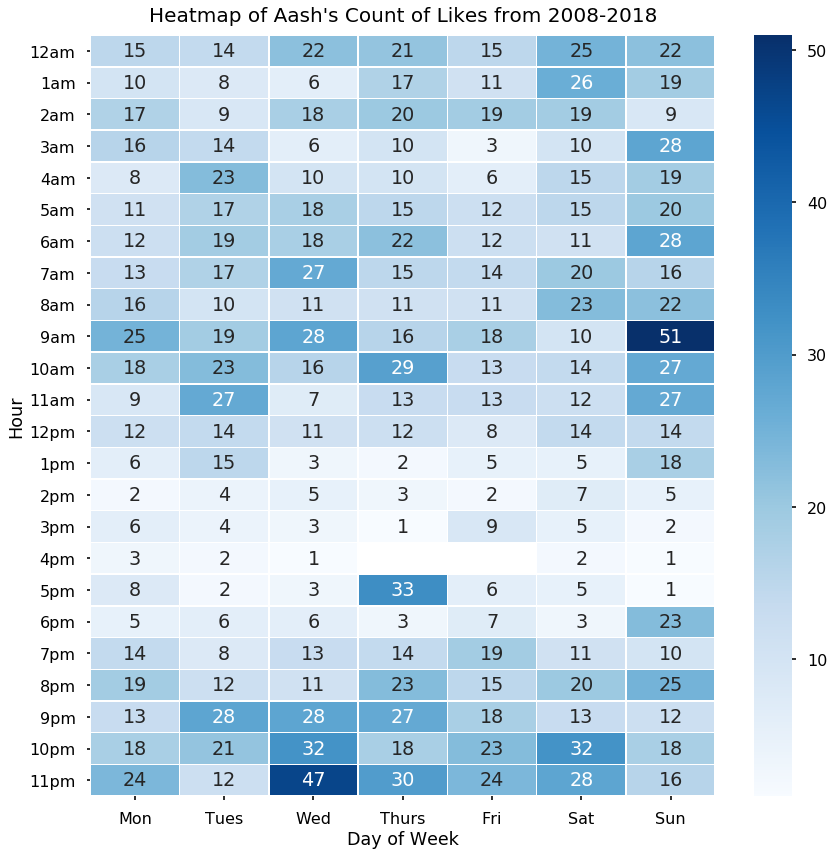

In [340]:
#Plot a heatmap with relevant customizations
sns.set_context("poster")
f, ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(df_aash_likes3, annot=True, linewidths=0.5,\
                 ax=ax, cmap="Blues", xticklabels=day_short_names, yticklabels=detailed_hours)
ax.axes.set_title("Heatmap of Aash's Count of Likes from 2008-2018", fontsize=20, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Hour');

#### D.8 Plotting Aash's heatmap for comments

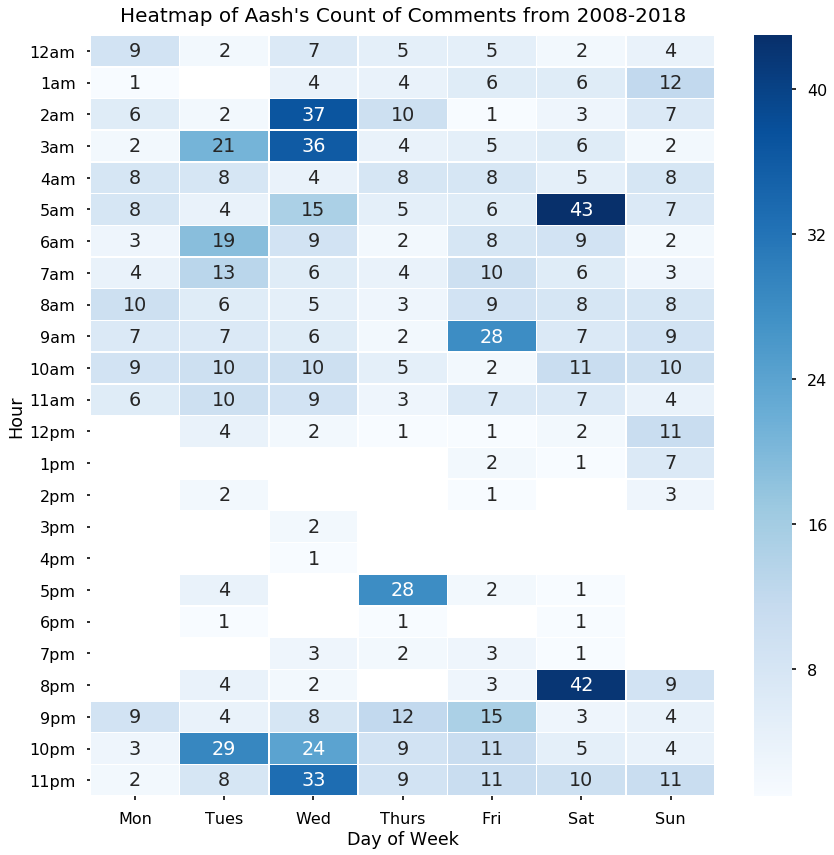

In [341]:
#Plot a heatmap with relevant customizations
sns.set_context("poster")
f, ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(df_aash_comments3, annot=True, linewidths=.5,
                 ax=ax, cmap="Blues", xticklabels=day_short_names, yticklabels=detailed_hours)
ax.axes.set_title("Heatmap of Aash's Count of Comments from 2008-2018", fontsize=20, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Hour');

#### Insights: From the above two heatmaps it can be inferred that Hypothesis D.1 is not entirely correct for Aash, as while she comments most on Saturdays from 8pm-9pm and from 5am-6am, suggesting she comments before she goes out on Saturday nights and replies to comments early next morning when she returns. However, she also actively comments on Wednesday nights 2am-4am suggesting she most likely comments on Facebook not just on weekends but after night outs.  Her "like" activity follows a similar trend

### E. The data also has a list of advertisers who have added our information to their list. Given our distinct backgrounds, we were curious to see if we have any common advertisers and so we visualized the same with a venn diagram wordcloud

#### E.1 Hypothesis: Even with their diverse backgrounds, Ribo and Aash should have some common advertisers

In [327]:
#Since the data is downloaded in json, we use the following code to convert .json files to pandas dataframes
with open('advertisers_who_uploaded_a_contact_list_with_your_information_aash.json') as json_data:
    ads_aash = json.load(json_data)
    
with open('advertisers_who_uploaded_a_contact_list_with_your_information_Ribo.json') as json_data:
    ads_ribo = json.load(json_data)

In [328]:
#Convert the nested dictionary to a dataframe
df_ads_aash=pd.DataFrame.from_dict(ads_aash['custom_audiences'])
df_ads_ribo=pd.DataFrame.from_dict(ads_ribo['custom_audiences'])

In [329]:
#Rename columns
df_ads_aash.columns = ['Advertisers']
df_ads_ribo.columns = ['Advertisers']

In [147]:
#Convert Series to a list
ads_aash=df_ads_aash['Advertisers'].tolist()
ads_ribo=df_ads_ribo['Advertisers'].tolist()

In [193]:
#Define a function to keep only ascii characters in a string, to filter out accents and other unicode characters
def isascii(s):
    return all(ascii.isascii(c) for c in s)

In [165]:
#Filter out advertisers with non-ascii character in their names and names which are too long
ads_aash_clean = []
for ads in ads_aash:
    ads = ads[: 12]
    ads = ads.replace(' ', '')
    if isascii(ads):
            ads_aash_clean.append(ads)
            
ads_ribo_clean = []
for ads in ads_ribo:
    ads = ads[: 12]
    ads = ads.replace(' ', '')
    if isascii(ads):
            ads_ribo_clean.append(ads)

In [166]:
#Join the lists to make one string for each list
string_aash = (" ").join(ads_aash_clean)
string_ribo = (" ").join(ads_ribo_clean)

In [168]:
#Create sets of advertisers for Aash and Ribo
sets = []
for string in [string_aash, string_ribo]:
    # get a word list
    words = string.split(' ')
    words = [''.join(ch for ch in word) for word in words]
    # convert to all lower case
    words = [word.lower() for word in words]
    sets.append(set(words))

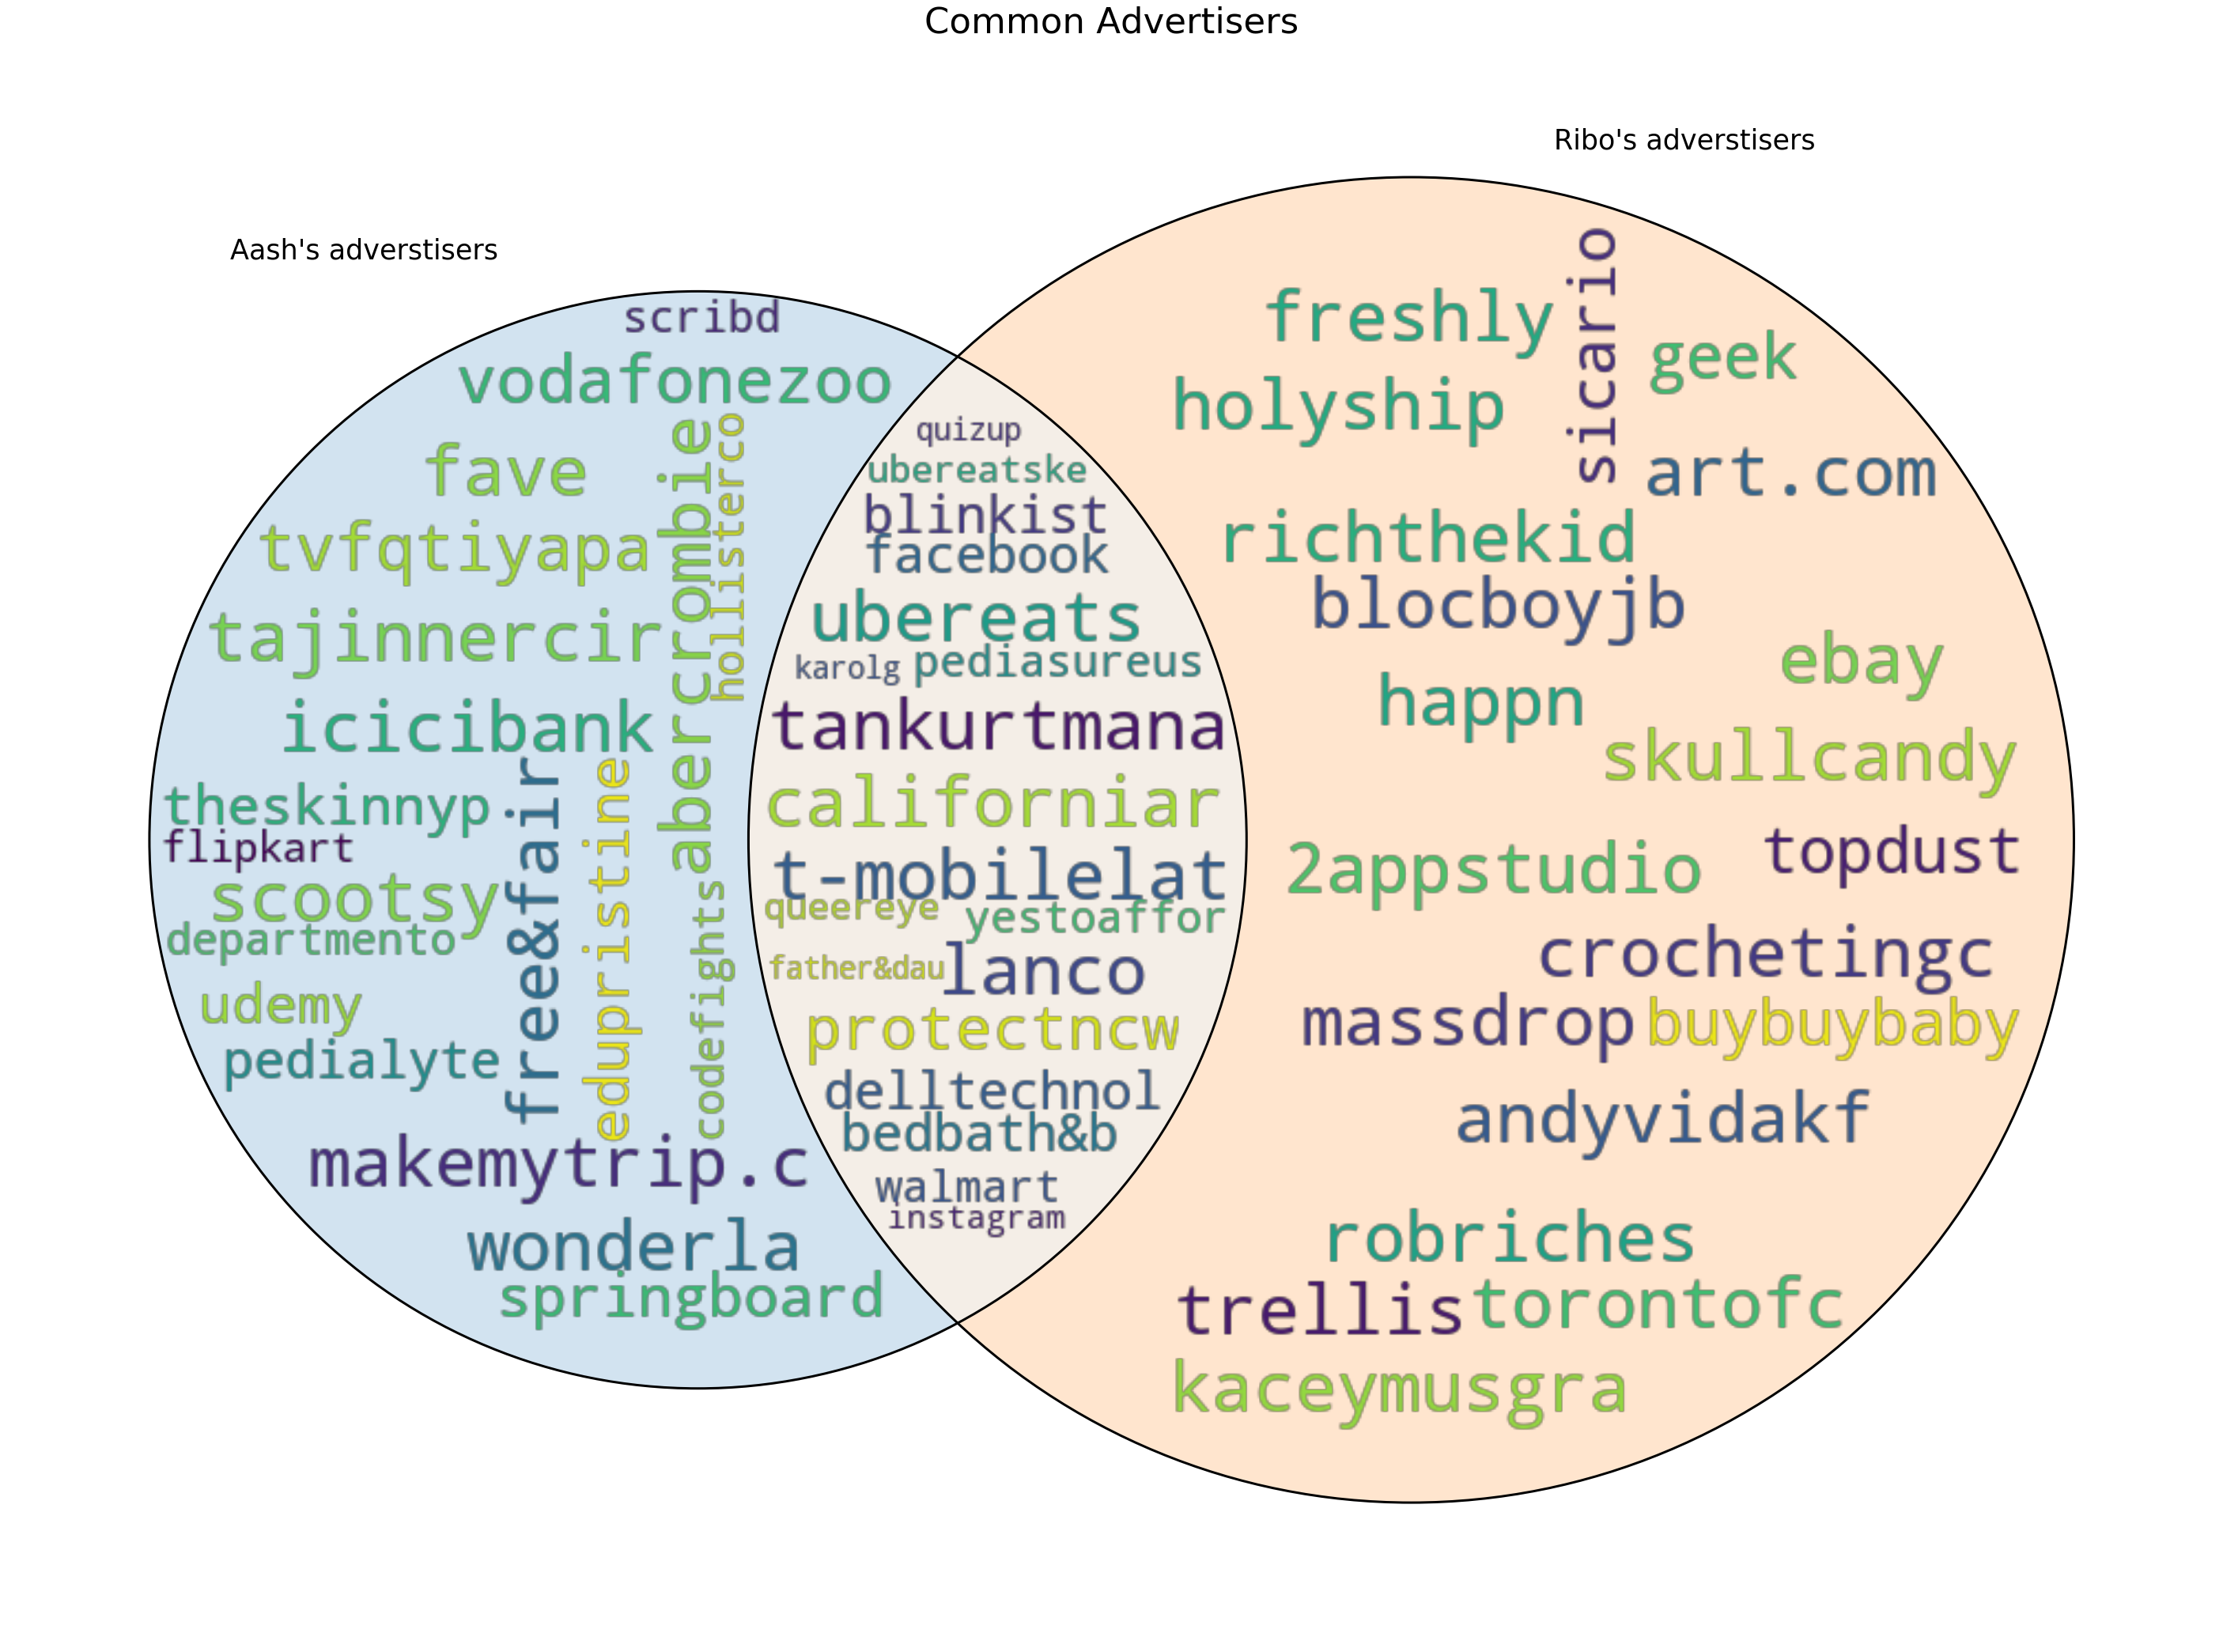

In [189]:
#Plot the sets into a venn diagram wordcloud and customize appropriately
venn2_wordcloud(sets, set_colors=['tab:blue', 'tab:orange'], alpha=0.2,\
                wordcloud_kwargs={'width':40, 'max_words':20, 'min_font_size':12});
plt.title("Common Advertisers", fontsize=45, y=1);
fig_size = plt.rcParams["figure.figsize"];
fig_size[0] = 50;
fig_size[1] = 40;
plt.text(100, 100, 'Aash\'s adverstisers', fontsize=35);
plt.text(700, 50, 'Ribo\'s adverstisers', fontsize=35);

#### Insights: From the Venn diagram wordcloud above, it can be inferred that Hypothesis E.1 is correct as Ribo and Aash do have many common advertisers such as Ubereats, Instagram, Walmart, T-mobile, Dell, Facebook etcetra 